<a href="https://colab.research.google.com/github/pratikwatwani/Applied-Data-Science/blob/master/Session%2008%20and%20Session%2009/PCA%2C%20Logistic%20Regression%20and%20Time%20Series%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1. Visualization of Hand-Written Digits

As one of the examples sklearn provides a dataset of handwritten digits. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy.stats import t
from sklearn import preprocessing
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [387]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [388]:
#original image data is a 2D array
X.shape

(1797, 64)

In [0]:
#split data into training, validation and test samples
X1=X[:1000,:]; y1=y[:1000]
X2=X[1000:-300,:]; y2=y[1000:-300]
X3=X[-300:,:]; y3=y[-300:]

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


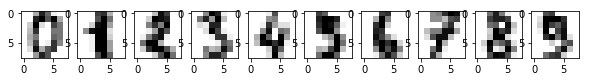

In [390]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

In [391]:
print("{},{},{}".format(X1.shape[0],X2.shape[0],X3.shape[0]))

1000,497,300


Now apply PCA to see if we can describe the data with a smaller number of most significant features

### Q1. Use PCA to transform the first 1000 digit images (X1). How many leading principal components are needed to cover a)50%, b)80% of the information from the original dataset?
Make sure to standardize the data beofe applying PCA

In [0]:
#X is the original data set with 1797 rows, and 64 features
#X1 is the training set with 1000 rows
#X2 is the validation set with 497 rows
#X3 is the testing set with 300 rows 

In [0]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [0]:
u,s,v = np.linalg.svd(X1)

In [0]:
var_dict = {}
for k in range(0, 64):
  var_dict[k] = (s[k]/s.sum())*100

In [396]:
df = pd.DataFrame.from_dict(var_dict, orient = 'index', columns = ['Variance Retained'])
df.index.name = 'Principal Component'
df.head()

,Variance Retained
Principal Component,
0,5.378238
1,4.818316
2,4.458901
3,4.123033
4,3.550910


In [0]:
covar_matrix = PCA(n_components = 64)
covar_matrix.fit(X1)
variance = covar_matrix.explained_variance_ratio_ 
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=2)*100)

In [398]:
var

array([12., 22., 30., 37., 42., 46., 50., 53., 56., 59., 62., 64., 66.,
       68., 70., 72., 74., 76., 78., 80., 81., 82., 83., 84., 85., 86.,
       87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 96., 96., 96.,
       96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
       96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.])

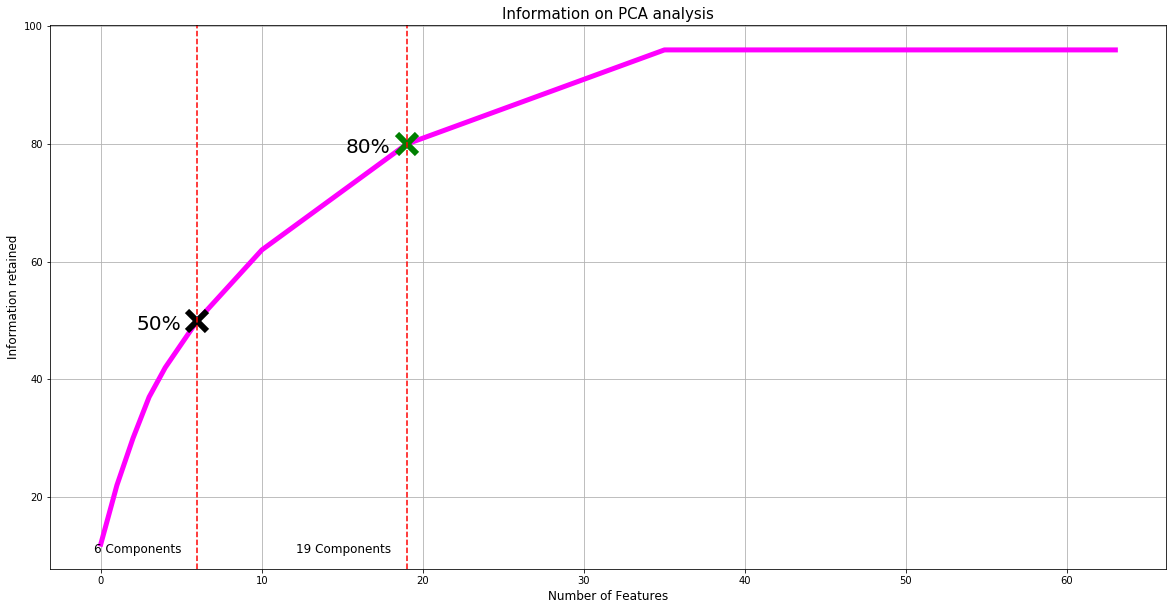

In [399]:
fig, ax = plt.subplots(figsize = (20,10))
ax.grid()
#ax.set_yticks(ticks = np.arange(0,200,10))

plt.plot(var, linewidth = 5, color = 'magenta')
plt.plot(np.where(var ==50)[0][0], 50, marker='x', mew = 6,markersize=20, color="k")
plt.plot(np.where(var ==80)[0][0], 80, marker='x', mew = 6, markersize=20, color='green')

plt.text(np.where(var == 50)[0][0]-1, 50+1,'50%', verticalalignment = 'top', horizontalalignment = 'right', fontsize = 20)
plt.text(np.where(var == 80)[0][0]-1, 80+1,'80%', verticalalignment = 'top', horizontalalignment = 'right', fontsize = 20)


plt.text(np.where(var == 50)[0][0]-1, 50-40,str(np.where(var == 50)[0][0])+' Components', verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 12)
plt.text(np.where(var == 80)[0][0]-1, 80-70,str(np.where(var == 80)[0][0])+' Components', verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 12)

ax.axvline(np.where(var == 50)[0][0],ymax = 50, color ='red', linestyle ='--' )
ax.axvline(np.where(var == 80)[0][0],ymax = 80,  color ='red', linestyle ='--' )

plt.xlabel('Number of Features', fontsize = 12)
plt.ylabel('Information retained', fontsize = 12)
plt.title('Information on PCA analysis', fontsize =15)
plt.show()

### Q2. Visualize digits 3, 6, 7 (y=3,6,7) using the first two principal components of X1  

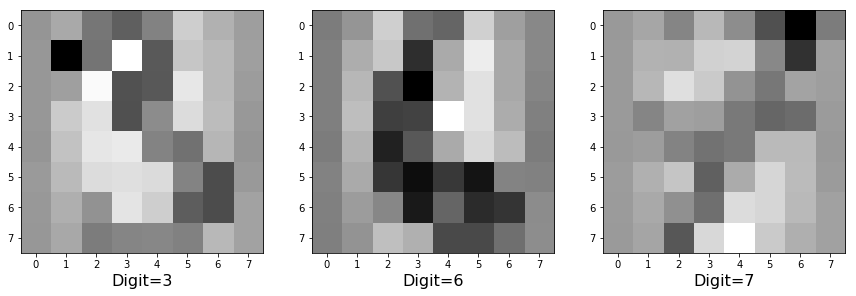

In [400]:
digits = [3,6,7]
count = 1

plt.figure(figsize=(20,15))

for digit in digits:
  plt.subplot(1,4, count)
  plt.xlabel('Digit=%i' %digit, fontsize =16)
  plt.imshow(X1[digit][:].reshape(8,8), cmap=plt.cm.gray_r)
  count+=1

plt.show()



## Task 2. Classify the digits using leading principal components

### Q1. Train multi-class logistic regression over the first 1000 digits using first 5 leading principal components
Report in-sample and out-of-sample (over X3, the last 300 digits) accuracy. 

You will need to apply the same scaler and PCA transform trained above to X3

Here and further use regularization constant C=10000 in logistic regression to avoid regularization

In [416]:
print("X(Original) number of records: {},\nX1(Training) number of records: {},\nX2(Validation) number of records: {},\nX3(Test) number of records: {}".format(X.shape[0],X1.shape[0],X2.shape[0],X3.shape[0]))

X(Original) number of records: 1797,
X1(Training) number of records: 1000,
X2(Validation) number of records: 497,
X3(Test) number of records: 300


### Q2. Select the optimal number of principal components for the classification above in terms of the out-of-sample accuracy measured over the validation sample X2. Report the performance of the classification after this feature selection over the test sample X3 of the last 300 digits.

## Task3. Time Series Analysis
**Dataset Description**
- Portland Oregon riders monthly data: It is a monthly count of riders for the Portland public transportation system. The website states that it is from January 1960 through June 1969

**Tasks**:
- Detect a trend
- Decompose into trend + seasonality + residuals
- Analyze residual distribution
- Select the top 3-5 outliers based on absolute values of residuals 

In [0]:
# import dataset
df = pd.read_csv("https://raw.githubusercontent.com/pratikwatwani/Applied-Data-Science/master/data/portland-oregon-average-monthly-.csv")

In [0]:
# change column name to make it easier for your life
df.columns = ["month", "avgMonthlyRide"]

In [0]:
# remove artifact data
df = df.drop(df.index[df['avgMonthlyRide'] == ' n=114'])

In [404]:
# type transfer: int32 for `avgMonthlyRide`, datetime for `month`
df['avgMonthlyRide'] = df['avgMonthlyRide'].astype(np.int32)
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')
df.head()

,month,avgMonthlyRide
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [405]:
# get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 2 columns):
month             114 non-null datetime64[ns]
avgMonthlyRide    114 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.2 KB


In [406]:
# get the describe of the dataset
df.describe()

,avgMonthlyRide
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


In [407]:
df['ym'] = pd.to_datetime(df['month'], format="%Y-%m").dt.to_period('M')
df.head()

,month,avgMonthlyRide,ym
0,1960-01-01,648,1960-01
1,1960-02-01,646,1960-02
2,1960-03-01,639,1960-03
3,1960-04-01,654,1960-04
4,1960-05-01,630,1960-05


### Q1. Visualize the time-series of monthly ridership

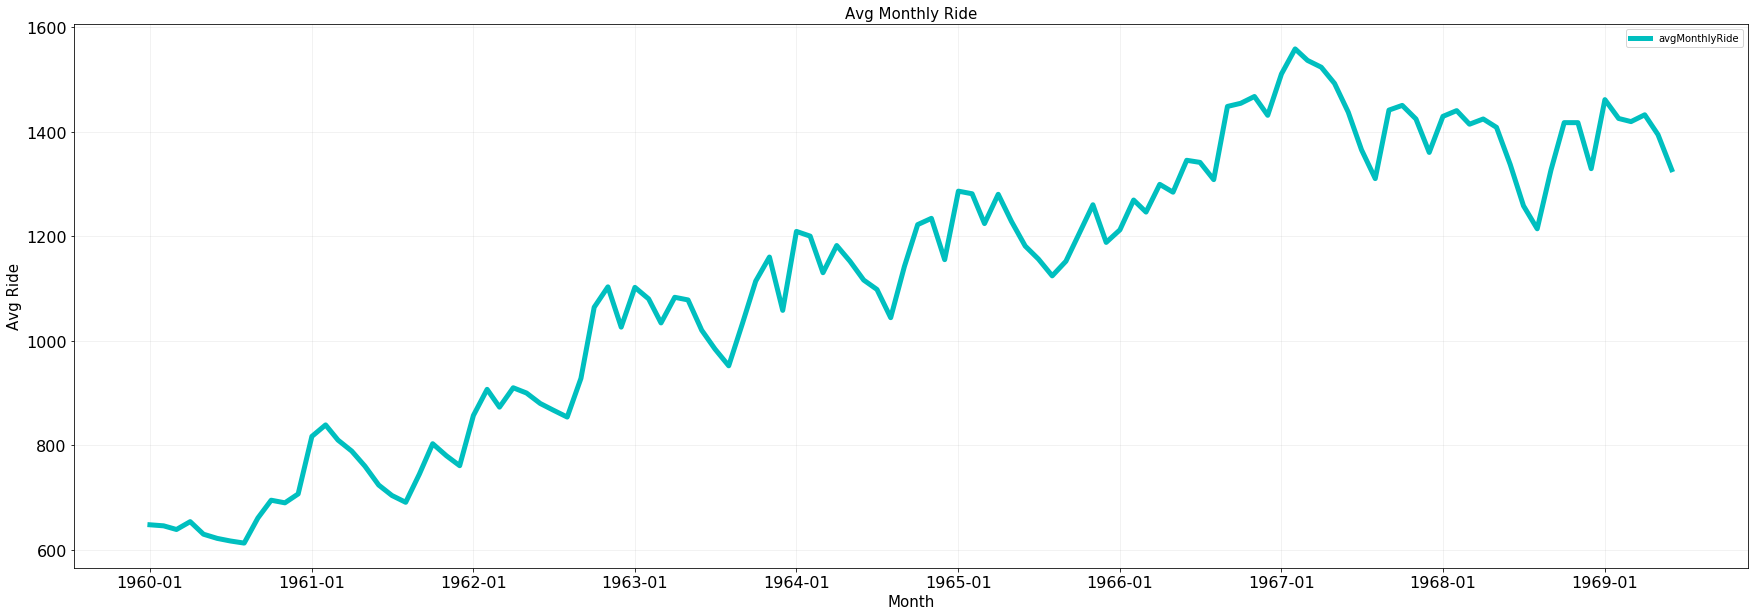

In [408]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df.month,df.avgMonthlyRide, color='c',linewidth=5)
ax.xaxis.set_major_formatter(DateFormatter("19%y-%m"))
plt.legend()
plt.tick_params(labelsize=16)
ax.grid(b=True, alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Avg Ride', fontsize = 15)
plt.title('Avg Monthly Ride', fontsize = 15)
plt.show()
plt.close()

### Q2. Visualize the 12-month moving average to assess the trend

### Q3. Perform seasonal decomposition using 12 month period

In [0]:
df.drop('ym', axis = 1, inplace = True)

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 2 columns):
month             114 non-null datetime64[ns]
avgMonthlyRide    114 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.2 KB


In [0]:
df_copy =df.copy()
df_copy.month = df.month.astype('str')

In [412]:
df.month[0].value

-315619200000000000

### Q4. Visualize the distribution of residues and visually compare it with normal distribution with the same mean and standard deviation

### Q5. Find the strongest lower/upper outliers (months with the smallest and largest residues)